# Solution: SIR model with a constant force of infection

In this etivity, you had the task of writing an SIR model in R from scratch. Compare your code to the solution given below, but note that yours might look slightly different in terms of the names you have chosen for your variables. That's fine, as long as the code is easy to follow and produces the correct output! 

Remember, the differential equations for the simple SIR model with a constant force of infection look like this:

\begin{align}
\frac{dS}{dt} & = -\lambda S \\
\frac{dI}{dt} & = \lambda S - \gamma I \\
\frac{dR}{dt} & = \gamma I
\end{align}

The input data from the instructions were as follows:  
**Initial number of people in each compartment**:  
S = 10$^6$-1, I = 1 and R = 0  
**Parameters**:  
$\lambda$ = 0.2 days$^{-1}$ (this represents a force of infection that's constant at 0.2)  
$\gamma$ = 0.1 days$^{-1}$ (corresponding to an average duration of infection of 10 days)  
**We want to run the model for 60 days**. 

In [1]:
# LOAD THE PACKAGES:
library(deSolve)
library(reshape2)
library(ggplot2)

# MODEL INPUTS:

# Vector storing the initial number of people in each compartment (at timestep 0)
initial_state_values <- c(S = 999999,  # the whole population we are modelling is susceptible to infection
                          I = 1,       # the epidemic starts with a single infected person
                          R = 0)       # there is no prior immunity in the population

# Vector storing the parameters describing the transition rates in units of days^-1
parameters <- c(lambda = 0.2,  # the force of infection, which acts on susceptibles
                gamma = 0.1)   # the rate of recovery, which acts on those infected

# TIMESTEPS:

# Vector storing the sequence of timesteps to solve the model at
times <- seq(from = 0, to = 60, by = 1)   # from 0 to 60 days in daily intervals

# SIR MODEL FUNCTION: 

# The model function takes as input arguments (in the following order): time, state and parameters
sir_model <- function(time, state, parameters) {  

    with(as.list(c(state, parameters)), {  # tell R to unpack variable names from the state and parameters inputs
        
    # The differential equations
      dS <- -lambda * S               # people move out of (-) the S compartment at a rate lambda (force of infection)
      dI <- lambda * S - gamma * I    # people move into (+) the I compartment from S at a rate lambda, 
                                      # and move out of (-) the I compartment at a rate gamma (recovery)
      dR <- gamma * I                 # people move into (+) the R compartment from I at a rate gamma
      
    # Return the number of people in the S, I and R compartments at each timestep 
    # (in the same order as the input state variables)
    return(list(c(dS, dI, dR))) 
    })
  
}

# MODEL OUTPUT (solving the differential equations):

# Solving the differential equations using the ode integration algorithm
output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))
# Printing the model output returns a dataframe with columns time (containing the times vector), 
# S (containing the number of susceptible people at each timestep),
# I (containing the number of infected people at each timestep) and 
# R (containing the number of recovered people at each timestep).
output

Warning message:
"package 'deSolve' was built under R version 3.6.1"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


time,S,I,R
0,999999.000,1.0,0.000
1,818729.935,172214.1,9056.004
2,670319.375,296821.9,32858.688
3,548811.086,384013.5,67175.386
4,449328.506,441982.4,108689.084
5,367879.052,477302.6,154818.340
6,301193.883,495235.0,203571.160
7,246596.683,499976.7,253426.573
8,201896.281,494864.9,303238.803
9,165298.685,482541.5,352159.774


Plotting the output:

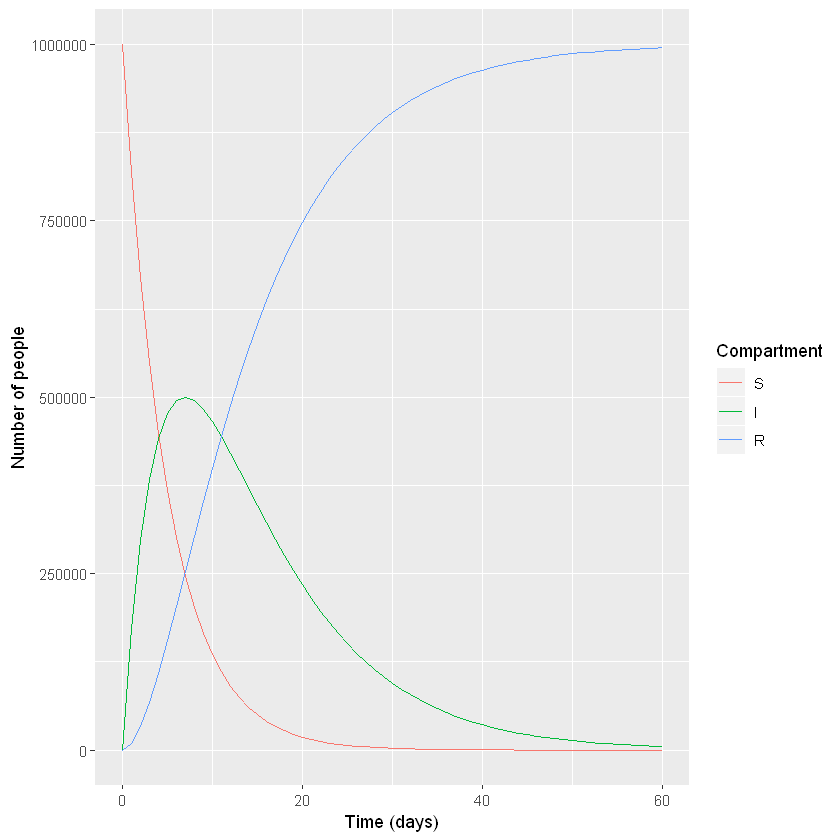

In [2]:
output_long <- melt(as.data.frame(output), id = "time")                  # turn output dataset into long format

ggplot(data = output_long,                                               # specify object containing data to plot
       aes(x = time, y = value, colour = variable, group = variable)) +  # assign columns to axes and groups
  geom_line() +                                                          # represent data as lines
  xlab("Time (days)")+                                                   # add label for x axis
  ylab("Number of people") +                                             # add label for y axis
  labs(colour = "Compartment")                                           # add legend title

### Based on the plot, describe the pattern of the epidemic over the 2 month period. How does the number of people in the susceptible, infected and recovered compartment change over time? After how many days does the epidemic reach its peak? After how many days does it end?

The number of infected people quickly increases, reaching a peak of 500000 infected people after around 7 days, before steadily decreasing again. 
The number of recovered people starts to rise shortly after the first people become infected. It increases steadily (but less sharply than the curve of infected people) until the whole population has become immune - by day 53, 99% are in the R compartment, and nearly no susceptible people remain after 60 days.